# Cap Tag Report

Run a cap tag report (same output as in Excel).
    
**Inputs** 
1. PR number and revision in form: PR_rev, i.e. '1-IWH6ME_2'
2. Directory to write cap tag report .csv file to, i.e. 'C:\\Users\\wb5888\\Documents\\Cap Tags'

**Outputs**
1. On-screen cap tag report
2. Report exported as .csv file with name CP_PR_rev.csv, i.e. '1-IWH6ME_2.csv' to directory provided above

### Input PR_rev and specify directory

In [1]:
%matplotlib inline
import CapTags as ct
import numpy as np
import datetime as dt
import pandas as pd

pr_rev = '1-HMV6JD_3'

write_dir = 'C:\\Users\\wb5888\\Documents\\Cap Tags'

### View Report

View report that will be exported.

In [2]:
report = ct.get_report(pr_rev)
print('found {} accounts.'.format(len(np.unique(report.AccountID))))
report

found 1 accounts.


,CustomerName,CustomerID,LDC_Account,AccountID,UIDaccount,MarketCode,ContractID,Revision,StartTime,StopTime,TagType,Tag,SourceType,TimeStamp
0,"LANTHEUS MEDICAL IMAGING, INC",1-1QZ5QE,2629670017,NEPOOL_MECO_2629670017,339353,NEPOOL,1-HMV6JD,3,2016-06-01,2017-05-31 23:59:59,CAPACITY_TAG_OVRD,168.291094,E,2019-07-22 09:06:01
1,"LANTHEUS MEDICAL IMAGING, INC",1-1QZ5QE,2629670017,NEPOOL_MECO_2629670017,339353,NEPOOL,1-HMV6JD,3,2017-06-01,2018-05-31 23:59:59,CAPACITY_TAG_OVRD,180.571000,H,2019-07-22 09:06:01
2,"LANTHEUS MEDICAL IMAGING, INC",1-1QZ5QE,2629670017,NEPOOL_MECO_2629670017,339353,NEPOOL,1-HMV6JD,3,2018-06-01,2019-05-31 23:59:59,CAPACITY_TAG_OVRD,180.571000,H,2019-07-22 09:06:01
3,"LANTHEUS MEDICAL IMAGING, INC",1-1QZ5QE,2629670017,NEPOOL_MECO_2629670017,339353,NEPOOL,1-HMV6JD,3,2019-06-01,2020-05-31 23:59:59,CAPACITY_TAG_OVRD,180.571000,S,2019-07-22 09:20:33
4,"LANTHEUS MEDICAL IMAGING, INC",1-1QZ5QE,2629670017,NEPOOL_MECO_2629670017,339353,NEPOOL,1-HMV6JD,3,2020-06-01,2021-05-31 23:59:59,CAPACITY_TAG_OVRD,180.571000,S,2019-07-22 09:20:33
5,"LANTHEUS MEDICAL IMAGING, INC",1-1QZ5QE,2629670017,NEPOOL_MECO_2629670017,339353,NEPOOL,1-HMV6JD,3,2021-06-01,2031-05-31 23:59:59,CAPACITY_TAG_OVRD,180.571000,S,2019-07-22 09:20:33


### Check Dates

Ensure tags for all meters cover PR start and end dates.

In [3]:
date_errors = ct.checkPRdates(report, pr_rev)

      estimated tag
meter    2629670017


In [43]:
date_errors[0]
#date_errors.to_csv('tag_errors.csv')

,zero tag
meter,035014378463


### Export Report to *write_dir*

In [4]:
ct.export_report(pr_rev, write_dir)

saved file as CP_1-HMV6JD_3.csv


# Offer Summary

Download forecasts (~4s *per meter*), check tags & peaks, graph.

**Inputs** 
1. PR number and revision in form: PR_rev, i.e. '1-IWH6ME_2'
2. Tag Report (from above, as dataframe)

**Outputs**
1. Meter forecasts in /write_dir/PR_rev
2. Problem meters & plots (on-screen)

In [5]:
meters, idr_dir = ct.download_idr(pr_rev, report, write_dir)

created directory: C:\Users\wb5888\Documents\Cap Tags\1-HMV6JD_3_CH3
downloading forecasts for 1 meters...
expect to take 3.4 seconds.
download complete


## Merge forecasts into df

In [6]:
master_idr = ct.merge_idr(meters, idr_dir)
master_idr.head()

importing and merging .csv's...
read in and merged ch 3.


,NEPOOL_MECO_2629670017
time,
2019-01-01 01:00:00,120.470981
2019-01-01 02:00:00,122.228695
2019-01-01 03:00:00,123.986408
2019-01-01 04:00:00,124.121617
2019-01-01 05:00:00,125.068078


## Run offer summary

**offer_summary()** function takes parameters **min_cp** and **min_diff**, which are the minimum tag values and minimum percent differences to look at.

                        Annual_Use_MWh  Act_Peak       CP      Tag  \
AccountID                                                            
NEPOOL_MECO_2629670017         1674.46    514.62  142.396  180.571   

                        Act_Tag_Diff  Cap_Tag_Diff  
AccountID                                           
NEPOOL_MECO_2629670017     184.99593    -21.141269  
PR has total usage of 1674.46 MWh.
PR has an estimated tag total of 180.571 kWh.
PR has CP peak sum of 142.396 kWh.
PR has peak (sum(act_peak)) of 514.62 kWh, and 1 meters.
graphing forecasts...


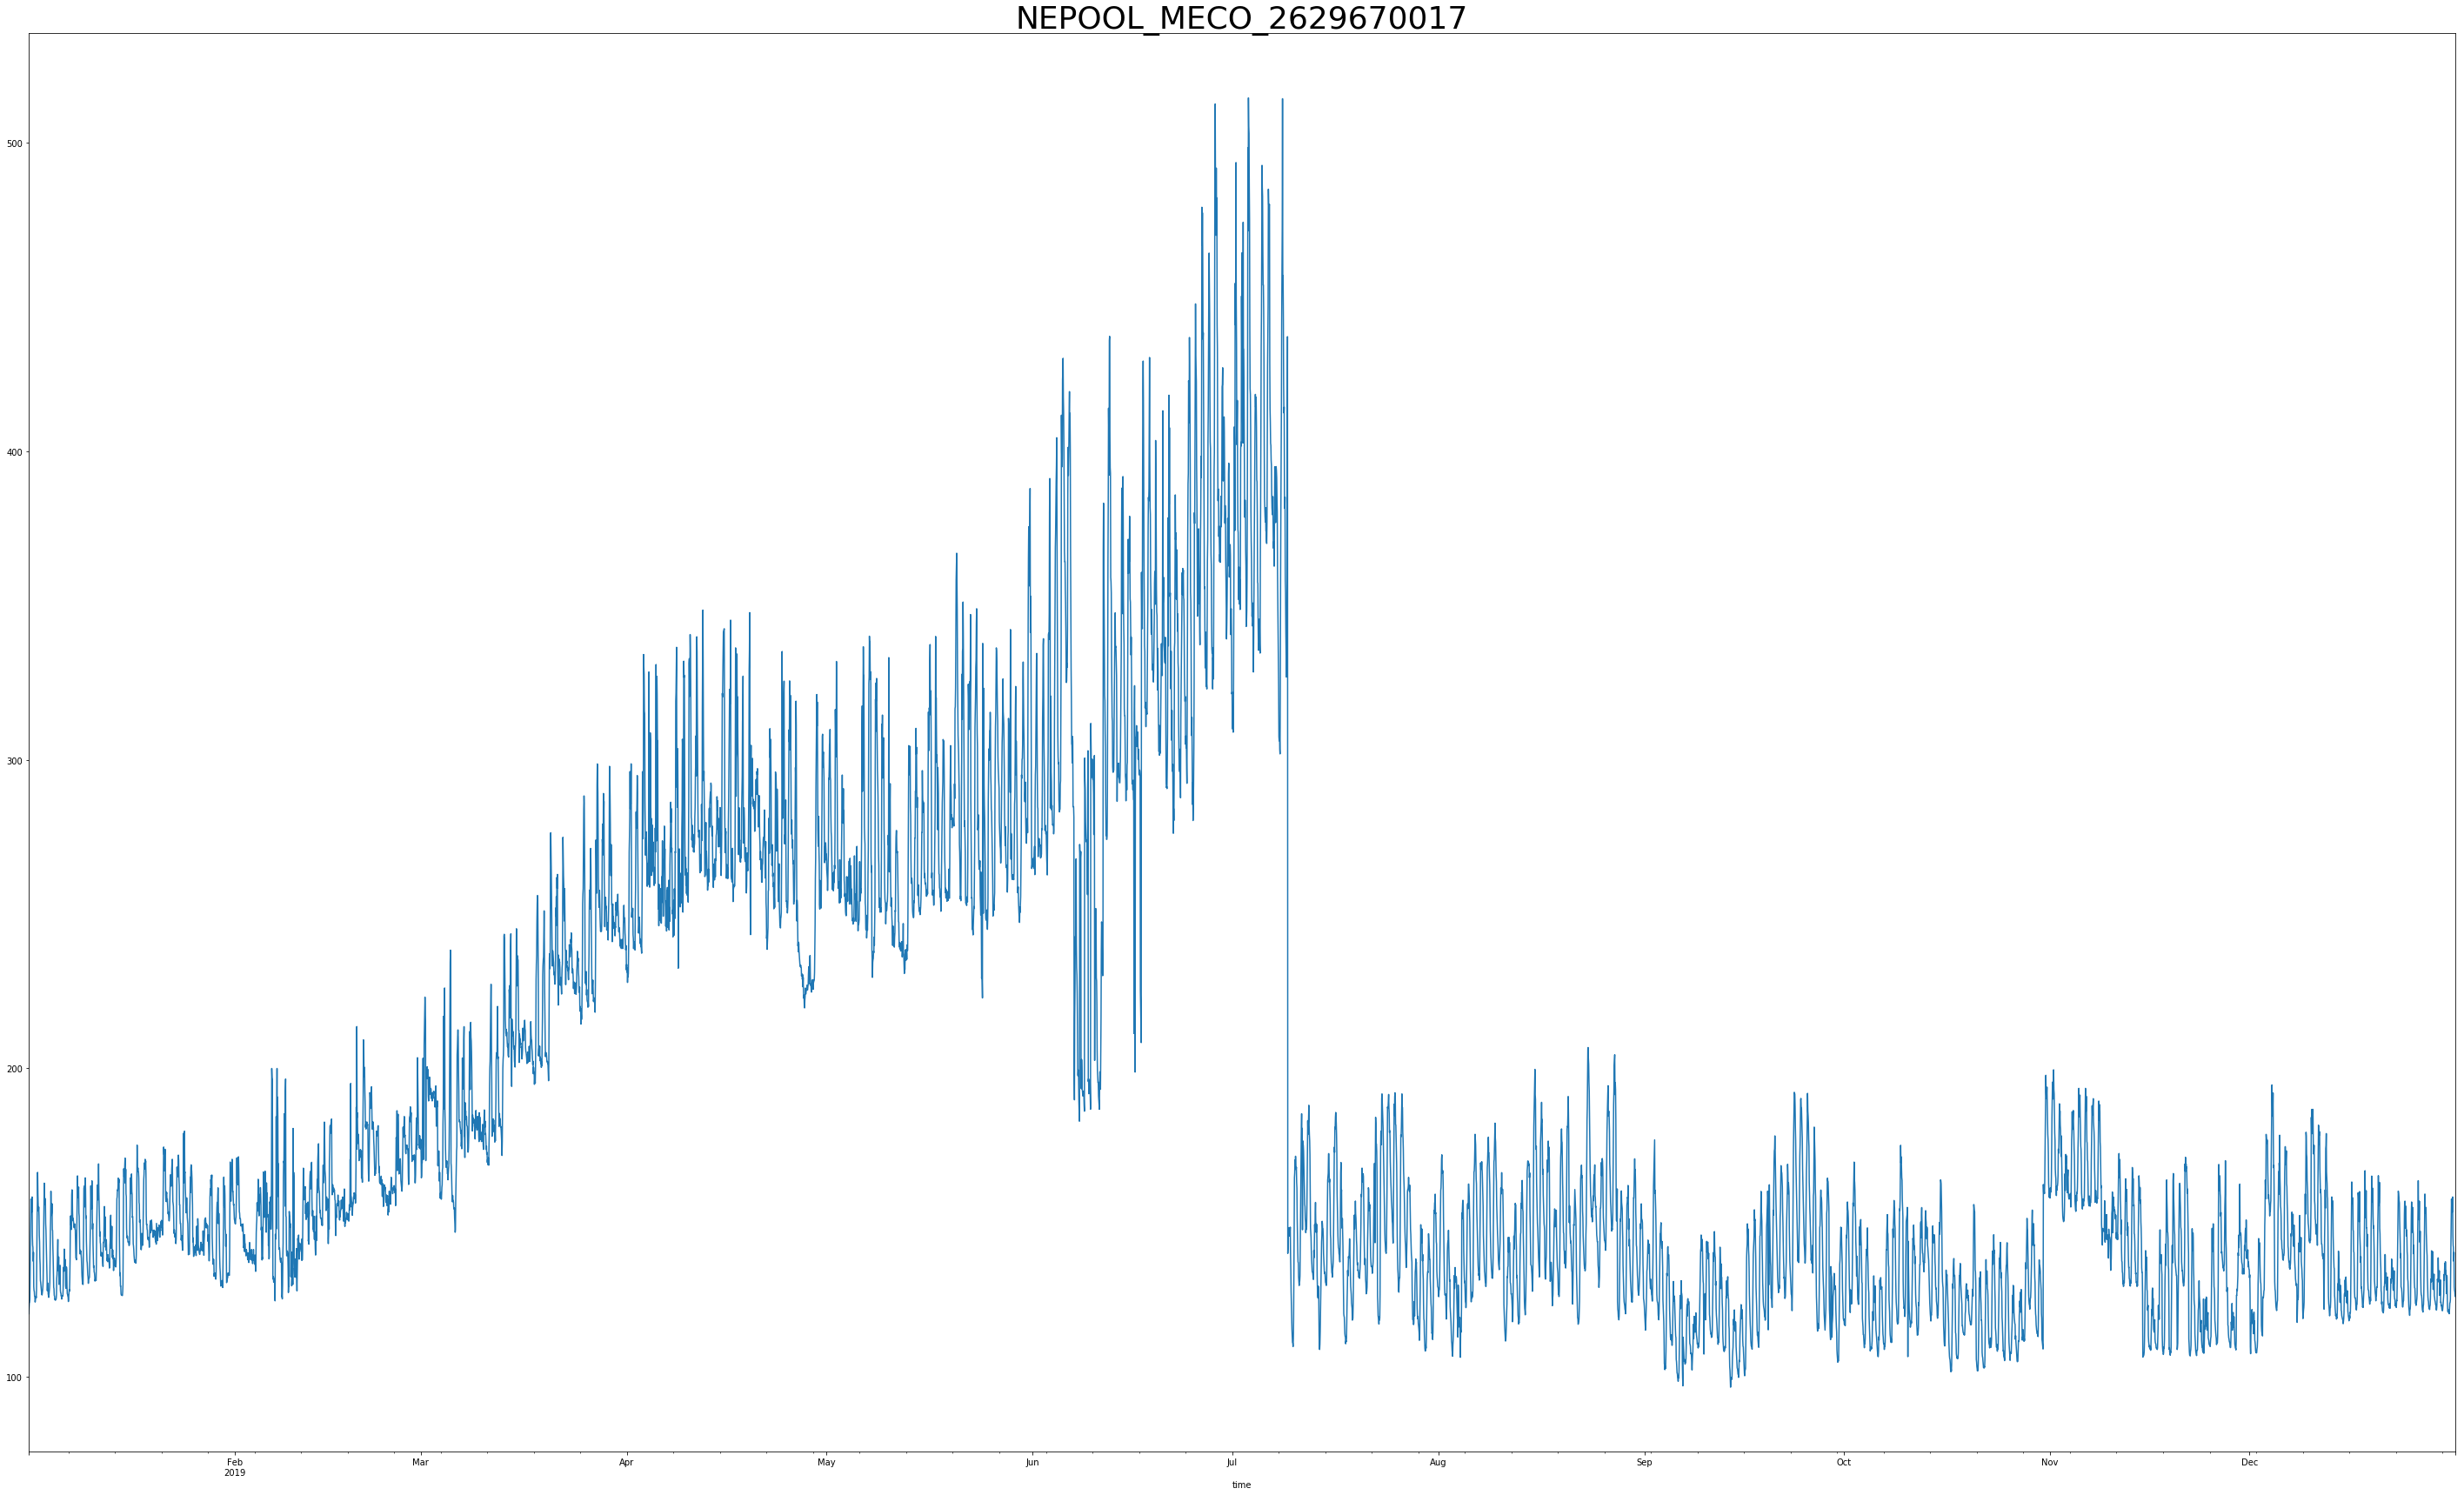

In [7]:
problem_meters = ct.offer_summary(master_idr, report, 0, 0)

In [37]:
problem_meters

,Annual_Use_MWh,Act_Peak,CP,Tag,Act_Tag_Diff,Cap_Tag_Diff
AccountID,,,,,,
NEPOOL_WMECO_54137597076_074773004,4372.656,724.248,586.980,152.694,374.313333,284.415891
NEPOOL_WMECO_54166297069_084873003,4408.080,720.252,529.308,570.433,26.264084,-7.209436
NEPOOL_WMECO_54441702016_762841007,41.266,17.598,10.437,25.382,-30.667402,-58.880309
NEPOOL_WMECO_54451102081_683341002,70.262,19.059,8.716,15.736,21.117184,-44.611083
NEPOOL_WMECO_54533967071_226882008,530.522,123.011,68.538,129.491,-5.004209,-47.071225
NEPOOL_WMECO_54616026043_654741003,463.462,108.132,79.348,118.927,-9.076997,-33.280079
NEPOOL_WMECO_54749297057_681873005,4849.852,766.800,464.940,484.794,58.170274,-4.095348
NEPOOL_WMECO_54846991057_320873008,2274.947,621.648,370.440,539.457,15.235876,-31.330949
NEPOOL_WMECO_54846991057_721341008,0.331,45.187,0.018,0.015,301146.666667,20.000000


## Backup graph, for offer summary plot errors

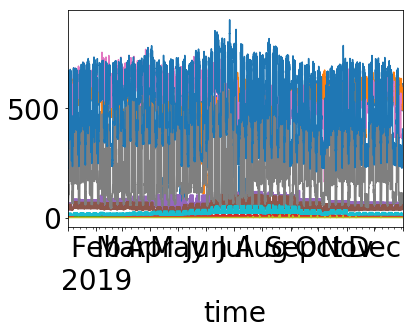

In [9]:
probs = problem_meters.index

for m in problem_meters.index:
    tmp = master_idr[m]
    tmp.plot(y = m)

## Individual Meter Plot

In [14]:
p = len(probs)
i = 0
print('working with {} meters.'.format(p))

working with 11 meters.


Iterate through probs (pd.series) and plot problem meters.

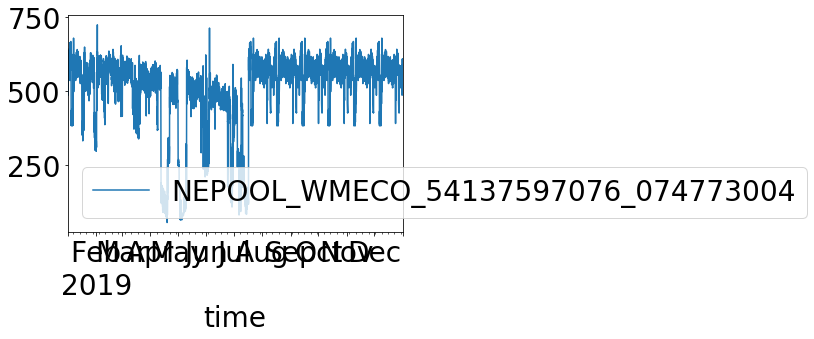

In [15]:
master_idr.plot(y = probs[i])
i+=1

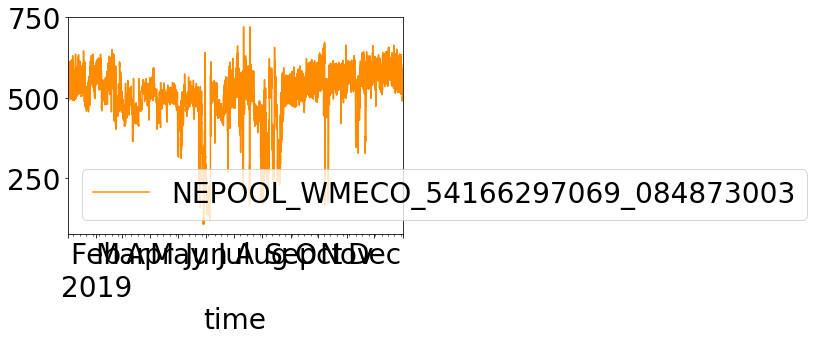

In [16]:
master_idr.plot(y = probs[i], color = 'darkorange')
i +=1

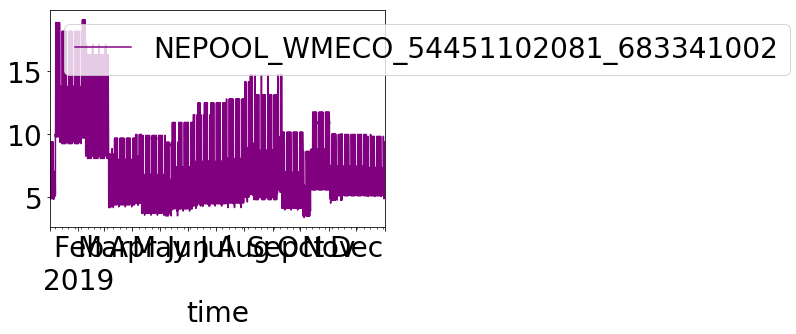

In [18]:
master_idr.plot(y = probs[i], color = "purple")
i += 1
#etc...

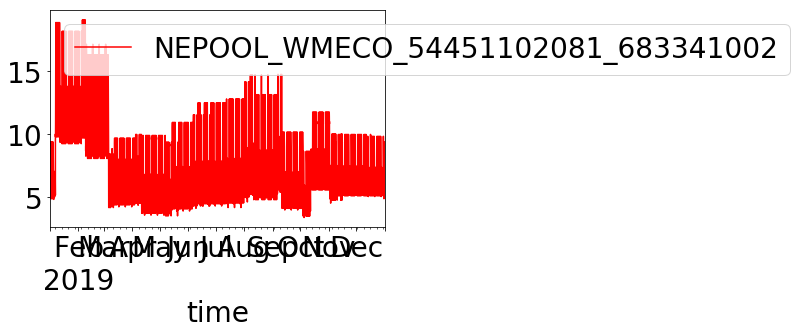

In [19]:
master_idr.plot(y = probs[i], color = "red")
i += 1

In [20]:
print('plotted {} out of {} meters...'.format(i, p))

plotted 4 out of 11 meters...


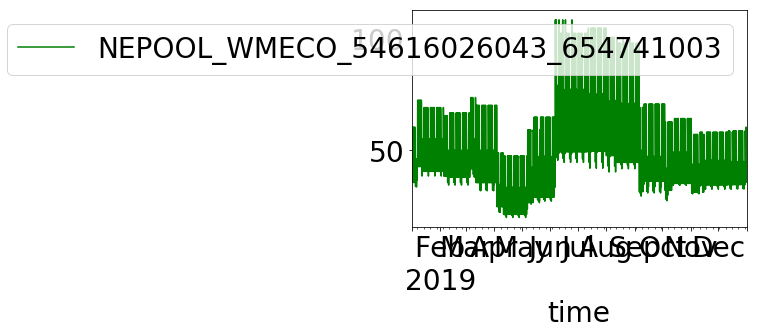

In [23]:
master_idr.plot(y = probs[i], color = "green")
i += 1

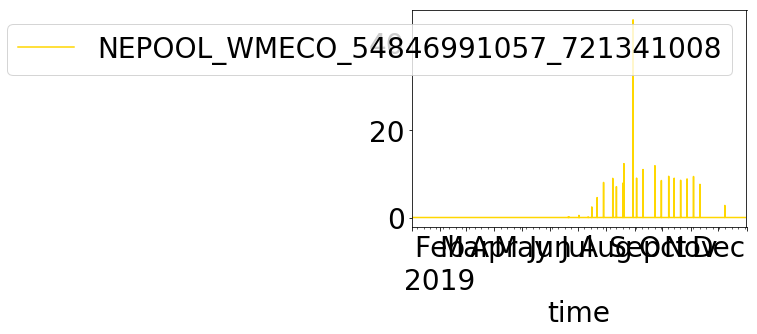

In [26]:
master_idr.plot(y = probs[i], color = "gold")
i += 1

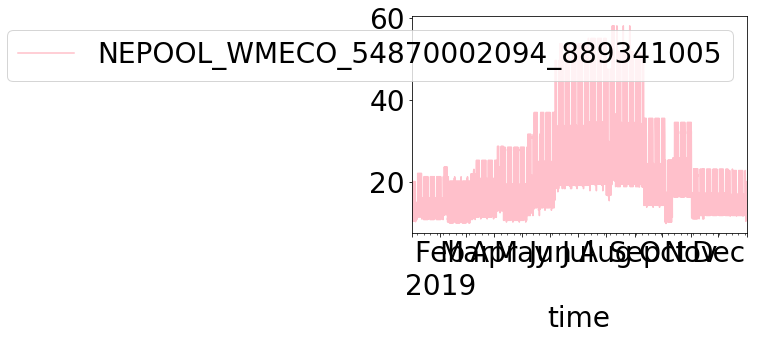

In [27]:
master_idr.plot(y = probs[i], color = "pink")
i += 1

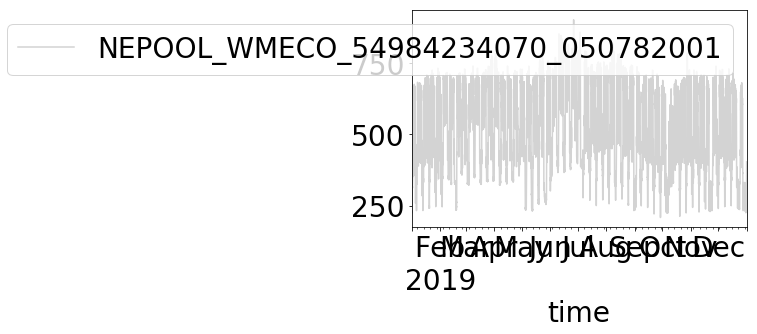

In [28]:
master_idr.plot(y = probs[i], color = "lightgray")
i += 1

In [32]:
#master_idr.plot(y = probs[i], color = "black")
#i += 1

In [31]:
print('plotted {} out of {} meters...'.format(i, p))

plotted 11 out of 11 meters...


In [ ]:
#master_idr.plot(y = probs[i], color = "black")
#i += 1

In [ ]:
print('plotted {} out of {} meters...'.format(i, p))

# TO DO

1. expand tag date functionality to all markets
2. split offer summary function up for API/package